In [1]:
 # κάνουμε update τις βιβλιοθήκες μας
!pip install -U scikit-learn
!pip install --upgrade pandas
!pip install -U scipy
!pip install --upgrade numpy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Ταξινομητές βασισμένοι στην παλινδόρμηση: Λογιστική Παλινδρόμηση (Logistic Regression)

Παρόμοια με τον Αφελή Μπεϋζιανό και τον kNN, θα φτιάξουμε έναν ταξινομητή βασισμένο στη Λογιστική Παλινδόμηση from scratch, προτού χρησιμοποιήσουμε την έτοιμη συνάρτηση του scikit. Ξεκινάμε, όπως είναι αναμενόμενο για αυτό το παράδειγμα ταξινομητών, από την γραμμική παλινδόμηση.

Η Λογιστική Παλινδρόμηση, παρά το όνομά της, είναι μέθοδος ταξινόμησης.

![](https://rajputhimanshu.files.wordpress.com/2018/03/linear_vs_logistic_regression.jpg)

## Γραμμική παλινδρόμηση

Η συνάρτηση της ευθείας είναι $y=mx+b$, όπου $m$ η κλίση της ευθείας και $b$ το σημείο τομής του άξονα $Y$. Στην περίπτωση όπου τα δεδομένα έχουν μία διάσταση (scalar), η διαχωριστική επιφάνεια (*η υπόθεση*) του ταξινομητή είναι μια απλή ευθεία, σύμφωνα με τον προηγούμενο τύπο. Η εύρεση των *εμπειρικών* $\hat{m}$ και $\hat{b}$ γίνεται με τη μέθοδο των ελαχίστων τετραγώνων.

### Μέθοδος των Ελάχιστων Τετραγώνων
Με τη Μέθοδο των Ελαχίστων Τετραγώνων προσπαθούμε να βρούμε μια ευθεία για την οποία η απόσταση κάθε σημείου $\{x_i, y_i\}$ είναι η ελάχιστη. Δήλαδή θέλουμε να βρούμε $$\min_{b,m}Q(b,m) \mbox{ όπου } Q(b,m) = \sum_{i=1}^n\hat{\varepsilon}_i^{\,2} = \sum_{i=1}^n (y_i - b - m x_i)^2\ $$

Χρησιμοποιώντας απειροστικό λογισμό, την γεωμετρία του εσωτερικού γινόμενου ή απλά αναπτύσσοντας την συνάρτηση μπορεί να δειχθεί ότι οι τιμές $ b $ και $ m $ οι οποίες ελαχιστοποιούν την συνάρτηση $Q(b,m)$ είναι:
$$ \begin{align} \hat{m} & = \frac{ \sum_{i=1}^{n} (x_{i}-\bar{x})(y_{i}-\bar{y}) }{ \sum_{i=1}^{n} (x_{i}-\bar{x})^2 }
  = \frac{ \sum_{i=1}^{n}{x_{i}y_{i}} - \frac1n \sum_{i=1}^{n}{x_{i}}\sum_{j=1}^{n}{y_{i}}}{ \sum_{i=1}^{n}({x_{i}^2}) - \frac1n (\sum_{i=1}^{n}{x_{i}})^2 } =\\  &= \frac{ \overline{xy} - \bar{x}\bar{y} }{ \overline{x^2} - \bar{x}^2 } =   \frac{ \operatorname{Cov}[x,y] }{ \operatorname{Var}[x] } = r_{xy} \frac{s_y}{s_x},\\ \hat{b}  & = \bar{y} - \hat{m}\,\bar{x}\end{align}$$

όπου $r_{xy} = \frac{ Cov[x,y] }{s_xs_y}$ είναι η παράμετρος συσχέτισης μεταξύ $x$ και $y$, $s_x$ είναι η τυπική απόκλιση του $x$, και $s_y$ είναι αντίστοιχα η τυπική απόκλιση του $y$. Η οριζόντια γραμμή πάνω από μια μεταβλητή δηλώνει τον απλό μέσο όρο της μεταβλητής. Για παράδειγμα: $\overline{xy} = \tfrac{1}{n}\textstyle\sum_{i=1}^n x_iy_i.$ Τα "b καπέλο" $\hat{b}$ και "m καπέλο" $\hat{m}$ ονομάζονται εκτιμήτριες ελάχιστων τετραγώνων.
Αντικαθιστώντας τις παραπάνω μαθηματικές εκφράσεις για τις παραμέτρους $\hat{b}$ και $\hat{m}$ στο $ y = \hat{b} + \hat{m} x, \,$ πέρνουμε

$\frac{ y-\bar{y}}{s_y} = r_{xy} \frac{ x-\bar{x}}{s_x}  $

Αυτό δείχνει ότι το $r_{xy}$ έχει το ρόλο της γραμμής παλινδρόμησης για τα σημεία. Η συνάρτηση $ y = \hat{b} + \hat{m} x, $ λέγεται ευθεία ελαχίστων τετραγώνων ή ευθεία παλινδρόμησης. 

Στη μηχανική μάθηση η συνάρτηση αυτή λέγεται συνάρτηση υπόθεσης ή απλά *υπόθεση* και συμβολίζεται ως $ h_\theta(x) = \theta_0 + \theta_1x$ (το $\hat{b}$ και $\hat{m}$ είναι οι παράμετροι $\theta_0$ και $\theta_1$ αντίστοιχα).


### Πολλαπλή γραμμική παλινδρόμηση

Σε περίπτωση που έχουμε δεδομένα που βρίσκονται εντός ενός πολυδιάστατου χώρου $m$, κάτι σύνηθες σε προβλήματα μηχανικής μάθησης, η ευθεία γενικεύεται (για *διανύσματα* εισόδου πλέον) σε $$y= β_1 ​ x_1 ​+...+β_mx_m ​ +b,$$ και μιλάμε πλέον για το πρόβλημα της πολλαπλής γραμμικής παλινδρόμησης όπου αναζητούμε τις τιμές $β$ (διάνυσμα) και b που ορίζουν το υπερεπίπεδο που έχει τη βέλτιστη προσαρμογή στα δεδομένα. 

Σημειώστε ότι το $y$ παραμένει ένας βαθμωτός αριθμος o οποίος στη γενική περίπτωση μπορεί να πάρει οποιαδήποτε τιμή.

## Από τη γραμμική στη λογιστική παλινδρόμηση

Σε περίπτωση που θα θέλαμε να μετατρέψουμε το πρόβλημα της παλινδρόμησης σε ένα πρόλβημα δυαδικής ταξινόμησης μια προσέγγιση θα ήταν να κοιτάξουμε το πεδίο τιμών της $y$ και να θέσουμε μια τιμή κατωφλιού $y_{thresh}$ για την οποία θα ισχύει $$\begin{align} y_{i} &=1 \text{, αν } y_i \geq y_{thresh} \text{ και }\\
y_{i} &=0 \text{ αλλιώς} \end{align}
$$
Το πρόβλημα με αυτή την ευρετική μέθοδο είναι ότι ενώ πρακτικά πράγματι μετατρέπει το πρόβλημα παλινδρόμησης σε δυαδική ταξινόμηση, δεν υπάρχει κάποια θεωρητική βάση για να υποστηρίξει την ορθότητα της απόφασης μας. Αυτή θα υπήρχε, αν με κάποιο τρόπο μπορούσαμε να λάβουμε μια συνάρτηση πυκνότητας πιθανότητας για τα $P(y_i)$ έτσι ώστε αν $P(y_i)\geq 0,5$ να έχουμε $y_{i} =1$

### Η λογιστική (σιγμοειδής) συνάρτηση
![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

Μια ιδιαίτερα βολική συνάρτηση για να λάβουμε τιμές στο διάσημα μεταξύ 0 και 1 είναι λογιστική σιγμοειδής συνάρτηση ή απλά λογιστική συνάρτηση:
$$ f(x)={\frac {1}{1+e^{-x}}} .$$ 
Ας την ορίσουμε:


In [2]:
import math

def sigmoid(x: float) -> float:
    return 1 / (1 + math.exp(-x))

assert sigmoid(0) == 0.5 
# Με την assert κάνουμε έλεγχο τιμών, μια καλή πρακτική 
# Αν δεν προκύπτει η ισότητα ο διερμηνευτής της Python θα πετάξει σφάλμα. 
# Αν είναι σωστή η τιμή η εκτέλεση θα συνεχιστεί χωρίς κάποια έξοδο.

### Δημιουργία μιας συνάρτησης καταστολής (squashing function)

Καταρχάς θα χρησιμοποιήσουμε ένα μικρό αλγεβρικό "τρικ" για να "ξεφορτωθούμε" τον όρο $b$ και να πάρουμε τη βολική μορφή του γινομένου. Θα προσθέσουμε στην αρχή του διανύσματος του $x$ έναν άσσο και στην αρχή του διανύσματος $β$ το $b$ ως εξής:
$$
\vec{x}=\left(\begin{array}{c}
1 \\
x_{1} \\
\cdots \\
x_{m}
\end{array}\right) \vec { β }=\left(\begin{array}{c}
b \\
\beta_{1} \\
\cdots \\
\beta_{m}
\end{array}\right)
$$

Συνεπώς τώρα μπορούμε να γράψουμε
$$y= b + β_1 ​ x_1 ​+...+β_mx_m ​ +b= b +β_1 ​ x_1 ​+...+β_mx_m ​ =\vec{x}\cdot \vec{β}$$
όπου "$\cdot$" είναι το εσωτερικό γινόμενο των δύο διανυσμάτων. Υλοποιούμε το εσωτερικό γινόμενο δύο διανυσμάτων:

In [3]:
from typing import List

def dot(a: List[float], b: List[float]) -> float:
    assert len(a) == len(b)
    return sum([a_i * b_i for a_i, b_i in zip(a, b)])

assert dot([1, 2, 3, 4], [5, 6, 7, 8]) == 70

Μπορούμε τώρα να γράψουμε τώρα τη δική μας συνάρτηση καταστολής `squash` η οποία εφαρμόζει τη σιγμοειδή συνάρτηση πάνω στο εσωτερικό γινόμενο δύο διανυσμάτων ή αλλιώς που υπολογίζει το 
$$ y= \sigma(β_1 ​ x_1 ​+...+β_mx_m ​ +b)$$ όπου $\sigma$ η σιγμοειδής:

In [4]:
def squash(beta: List[float], x: List[float]) -> float:
    assert len(beta) == len(x)
    # Calculate the dot product
    dot_result: float = dot(beta, x)
    # Use sigmoid to get a result between 0 and 1
    return sigmoid(dot_result)

assert squash([1, 2, 3, 4], [5, 6, 7, 8]) == 1.0

Έχουμε λοιπόν μετατρέψει το πρόβλημα παλινδρόμησης σε πρόβλημα δυαδικής ταξινόμησης. Το ζητούμενό μας τώρα είναι το εξής: εφόσον μιλάμε για ταξινόμηση, δηλαδή επιβλεπόμενη μάθηση, για κάθε $x_i$ θα μας δίνονται οι επιθυμητές ετικέτες 0 και 1 $y_i$ και εμείς θα πρέπει να προσδιορίσουμε τις βέλτιστες τιμές του $β$ ή αλλοιώς να προσδιορίσουμε την υπόθεση μας με όρους μηχανικής μάθησης.

### Συνάρτηση πυκνότητας πιθανότητας και συνάρτηση κόστους

Για να μπορέσουμε να προχωρήσουμε θα πρέπει να ορίσουμε μια συνάρτηση υπό συνθήκης πιθανότητας που θα εκφράζει κατά πόσο "πλησιάζουμε" στη σωστή ετικέτα $y_i$ για κάθε δείγμα $x_i$ και τα βάρη μας $β$. Αυτή η συνάρτηση θα πρέπει αν έχει πιθανότητα $\sigma(βx_i)$ για να είναι η ετικέτα "1" και $1-\sigma(βx_i)$ για να είναι η ετικέτα "0". Μπορούμε να το γράψουμε σε μία εξίσωση ως εξής:
$$
P\left(y_{i} \mid \beta x_{i}\right)=\sigma\left(\beta x_{i}\right)^{y_{i}} \times\left(1-\sigma\left(\beta x_{i}\right)\right)^{1-y_{i}}
$$
όπου ανάλογα αν $y_i=1$ ή $y_i=0$ μένει μόνο ο πρώτος ή ο δεύτερος όρος στη δεξιά πλευρά της εξίσωσης. Πρόκειται για τη συνάρτηση πιθανοφάνειας της υπόθεσής μας, η οποία επιθυμούμε να είναι η μέγιστη δυνατή.

Εφόσον μας δίνονται τα $x_i$ και $y_i$ και πρέπει να βρούμε τα βέλτιστα βάρη $β$ θα χρειαστούμε μια συνάρτηση σφάλματος ή απώλειας (loss) $L(β|y_ix_i)$ προς ελαχιστοποίηση. 
Αρχικά, θα πάρουμε τον λογάριθμο της πιθανοφάνειας, κάτι που κανουμε συχνά για υπολογιστικούς λόγους. Ο λογάριθμος έχει την ίδια μονοτονία με την αρχικη συνάρτηση αλλά μας δίνει αθροίσματα τιμών αντί για γινόμενα. Στη συνέχεια, εφόσον στοχεύουμε σε ελαχιστοποίηση και οι λογάριθμοι είναι αρνητικοί, θα χρησιμοποιήσουμε την αρνητική συνάρτηση του λογάριθμου της log-πιθανοφάνειας. Τελικά προκύπτει:
$$
\log L\left(\beta \mid x_{i} y_{i}\right)=-\left(y_{i} \log \left(\sigma\left(\beta x_{i}\right)\right)+\left(1-y_{i}\right) \log \left(1-\sigma\left(\beta x_{i}\right)\right)\right)
$$
που είναι η συνάρτηση λογαριθμικού σφάλματος ή απώλειας (Log Loss / Log Likelihood) προς ελαχιστοποίηση. Την ορίζουμε:


In [5]:
def neg_log_likelihood(y: float, y_pred: float) -> float:
    return -((y * math.log(y_pred)) + ((1 - y) * math.log(1 - y_pred)))

assert 2.30 < neg_log_likelihood(1, 0.1) < 2.31
assert 2.30 < neg_log_likelihood(0, 0.9) < 2.31
assert 0.10 < neg_log_likelihood(1, 0.9) < 0.11
assert 0.10 < neg_log_likelihood(0, 0.1) < 0.11

### Συνάρτηση κόστους
Η συνάρτηση κόστους (cost function) είναι απλά το άθροισμα του σφάλματος για όλο το dataset: 
$$
\text { Cost }=-\frac{1}{n} \sum_{i=1}^{n}\left(y_{i} \log \left(\sigma\left(\beta x_{i}\right)\right)+\left(1-y_{i}\right) \log \left(1-\sigma\left(\beta x_{i}\right)\right)\right)
$$
Την ορίζουμε:

In [6]:
def error(ys: List[float], ys_pred: List[float]) -> float:
    assert len(ys) == len(ys_pred)
    num_items: int = len(ys)
    sum_nll: float = sum([neg_log_likelihood(y, y_pred) for y, y_pred in zip(ys, ys_pred)])
    return (1 / num_items) * sum_nll

assert 2.30 < error([1], [0.1]) < 2.31
assert 2.30 < error([0], [0.9]) < 2.31
assert 0.10 < error([1], [0.9]) < 0.11
assert 0.10 < error([0], [0.1]) < 0.11

### Βελτιστοποίηση με κάθοδο κλίσης

Η μέθοδος βελτιστοποίησης που χρησιμοποιούμε κατά κανόνα στη μηχανική μάθηση είναι η κάθοδος κλίσης (gradient descent) ως προς κάθε διάσταση,
$$
\frac{\partial \text { Cost }}{\partial x_{ j}}=\frac{1}{n} \sum_{i=1}^{n}\left(\sigma\left(\beta x_{i}\right)-y_{i}\right) x_{i j},
$$
η οποία εγγυάται την εύρεση ενός τοπικού ελάχιστου. Προγραμματιστικά αυτό μπορεί να γραφτεί ως εξής:

```python
grad: List[float] = [0 for _ in range(len(beta))]
for x, y in zip(xs, ys):
    err: float = squash(beta, x) - y
    for i, x_i in enumerate(x):
        grad[i] += (err * x_i)
grad = [1 / len(x) * g_i for g_i in grad]
```

Τα βάρη $β_j$ στη συνέχεια θα ανανεώνονται επαναληπτικά ως εξής:

$$ β_j  \gets β_j - \alpha \frac{1}{n} \sum_{i=1}^{n}\left(\sigma\left(\beta x_{i}\right)-y_{i}\right) x_{i j},$$

όπου $α$ ο ρυθμός μάθησης (learning rate), μέχρι την ικανοποίηση κάποιου κριτήρίου σύγκλισης.

### Ένα παράδειγμα

Θα δοκιμάσουμε τον ταξινομήτή που φτιάξαμε σε ένα παράδειγμα με ένα δiσδιάστατο διαχωρίσιμο dataset.
Κατεβάζουμε τα δεδομένα μας και τα διαβάζουμε:

In [7]:
!wget -nc  https://tinyurl.com/y5oyomko -O data.csv

--2022-10-24 13:39:49--  https://tinyurl.com/y5oyomko
Resolving tinyurl.com (tinyurl.com)... 172.67.1.225, 104.20.138.65, 104.20.139.65, ...
Connecting to tinyurl.com (tinyurl.com)|172.67.1.225|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gist.githubusercontent.com/gsiolas/df2e54953cec6253db366312a4eae6f0/raw/0e7acd076b0975ac08caeabcf5f6acff805e4ba6/csv [following]
--2022-10-24 13:39:49--  https://gist.githubusercontent.com/gsiolas/df2e54953cec6253db366312a4eae6f0/raw/0e7acd076b0975ac08caeabcf5f6acff805e4ba6/csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1599 (1.6K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.56K  --.-KB/s    in 0s      

2022-10-24 13:3

In [8]:
toy_data_file = 'data.csv'

xs: List[List[float]] = []
ys: List[float] = []

with open(toy_data_file) as file:
    for line in file:
        data_point: List[str] = line.strip().split(',')
        y: int = int(data_point[0])
        x1: float = float(data_point[1])
        x2: float = float(data_point[2])
        xs.append([x1, x2])
        ys.append(y)

Ας κάνουμε μια απεικόνιση των δεδομένων μας:

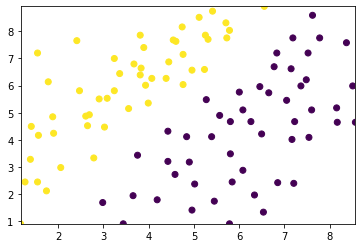

In [9]:
import matplotlib.pyplot as plt

x1s: List[float] = [x[0] for x in xs]
x2s: List[float] = [x[1] for x in xs]

plt.scatter(x1s, x2s, c=ys)
plt.axis([min(x1s), max(x1s), min(x2s), max(x2s)]);

Για να μπορέσουμε να χρησιμοποιήσουμε το αλγεβρικό τρικ που μας δίνει το γινόμενο $βx$ πρέπει να προσθέσουμε μια μονάδα στην αρχή κάθε διανύσματος εισόδου:

In [10]:
for x in xs:
    x.insert(0, 1)

xs[:5] # για να δούμε τα πέντε πρώτα διανύσματα


[[1, 2.6487, 4.5192],
 [1, 1.5438, 2.4443],
 [1, 1.899, 4.2409],
 [1, 2.4711, 5.8097],
 [1, 3.359, 6.4423]]

Έχουμε πλέον ό,τι χρειαζόμαστε για να προσαρμόσουμε τον ταξινομητή μας στα διαθέσιμα δεδομένα:

In [11]:
import random

beta: List[float] = [random.random() for _ in range(3)]

print(f'Starting with "beta": {beta}')

epochs: int = 5000
learning_rate: float = 0.01

for epoch in range(epochs):
    # Calculate the "predictions" (squishified dot product of `beta` and `x`) based on our current `beta` vector
    ys_pred: List[float] = [squash(beta, x) for x in xs]

    # Calculate and print the error
    if epoch % 1000 == True:
        loss: float = error(ys, ys_pred)
        print(f'Epoch {epoch} --> loss: {loss}')

    # Calculate the gradient
    grad: List[float] = [0 for _ in range(len(beta))]
    for x, y in zip(xs, ys):
        err: float = squash(beta, x) - y
        for i, x_i in enumerate(x):
            grad[i] += (err * x_i)
    grad = [1 / len(x) * g_i for g_i in grad]

    # Take a small step in the direction of greatest decrease
    beta = [b + (gb * -learning_rate) for b, gb in zip(beta, grad)]

print(f'Best estimate for "beta": {beta}')

Starting with "beta": [0.04679930323651016, 0.22420081523016955, 0.5090784821159893]
Epoch 1 --> loss: 1.9165651196966718
Epoch 1001 --> loss: 0.017886523272825586
Epoch 2001 --> loss: 0.010754851524214577
Epoch 3001 --> loss: 0.00785716900965857
Epoch 4001 --> loss: 0.006252231644364842
Best estimate for "beta": [5.4568686313154435, -6.744810377241063, 4.947133794859569]


Για να εκτιμήσουμε την απόδοση του ταξινομήτη μας θα τυπώσουμε τα γνωστά στατιστικά που συγκροτούν τον πίνακα σύγχυσης καθώς και τη συνολική ορθότητα.

Σημειώστε ότι τώρα το να θέσουμε ένα κατώφλι $\geq 0,5$ για την απόφασή μας είναι δόκιμο καθώς η έξοδος του ταξινομητή μας είναι μια συνάρτηση πυκνότητας πιθανότητας.

In [12]:
total: int = len(ys)
thresh: float = 0.5
true_positives: int = 0
true_negatives: int = 0
false_positives: int = 0
false_negatives: int = 0
for i, x in enumerate(xs):
    y: int = ys[i]
    pred: float = squash(beta, x)
    y_pred: int = 1
    if pred < thresh:
        y_pred = 0
    if y == 1 and y_pred == 1:
        true_positives += 1
    elif y == 0 and y_pred == 0:
        true_negatives += 1
    elif y == 1 and y_pred == 0:
        false_negatives += 1
    elif y == 0 and y_pred == 1:
        false_positives += 1

print(f'True Positives: {true_positives}')
print(f'True Negatives: {true_negatives}')
print(f'False Positives: {false_positives}')
print(f'False Negatives: {false_negatives}')
print(f'Accuracy: {(true_positives + true_negatives) / total}')
print(f'Error rate: {(false_positives + false_negatives) / total}')

True Positives: 50
True Negatives: 50
False Positives: 0
False Negatives: 0
Accuracy: 1.0
Error rate: 0.0


Τέλος, τυπώνουμε την ευθεία διαχωρισμού:

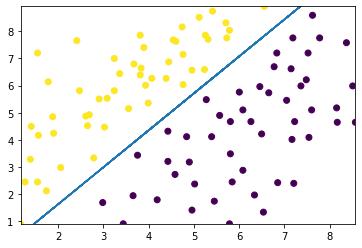

In [13]:
x1s: List[float] = [x[1] for x in xs]
x2s: List[float] = [x[2] for x in xs]
plt.scatter(x1s, x2s, c=ys)
plt.axis([min(x1s), max(x1s), min(x2s), max(x2s)]);

m: float = -(beta[1] / beta[2])
b: float = -(beta[0] / beta[2])

x2s: List[float] = [m * x[1] + b for x in xs]

plt.plot(x1s, x2s, '--');

## Λογιστική παλινδρόμηση του scikit με πολλές κατηγορίες

### Εισαγωγή των δεδομένων (Digits Dataset)

![](https://www.engineeringbigdata.com/wp-content/uploads/digits-plots-matplotlib.png)

Το digits dataset είναι ένα από τα datasets του scikit που δεν χρειάζεται το download αρχείων από εξωτερικά URLs. Ο ακόλουθος κώδικας θα φορτώσει το dataset.

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()

Τώρα που έχουμε φορτώσει το dataset μπορούμε να δούμε πόσα είναι τα δείγματα

In [15]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


υπάρχουν 1797 εικόνες και 1797 ετικέτες στο σύνολο δεδομένων.

### Οπτικοποίηση εικόνων και ετικετών 

Εδώ απλά θέλουμε να έχουμε εποπτεία του πως είναι μια εικόνα και ποια είναι η ετικέτα της. 

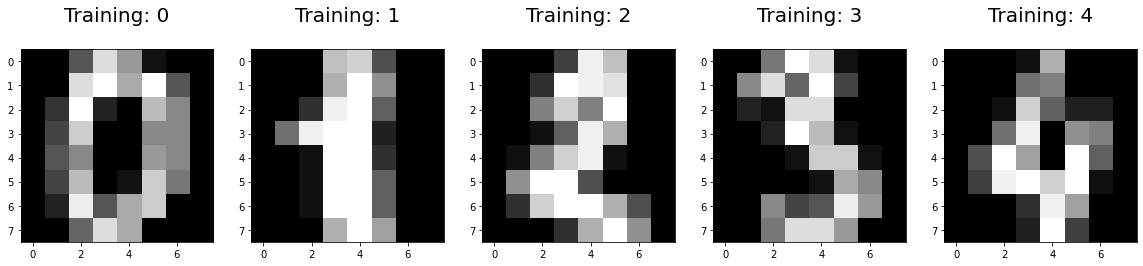

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

### Διαχωρισμός σε train και test set

Δημιουργούμε train και test sets ώστε να μπορέσουμε να εκτιμήσουμε την ικανότητα γενίκευσης του ταξινομητή μας. 

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

### Εκπαιδεύση ενός ταξινομητή λογιστικής παλινδρόμησης και προβλέψεις

[Documentation απο το scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

In [18]:
# Step 1. Import the model you want to use
from sklearn.linear_model import LogisticRegression
# Step 2. Make an instance of the Model
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(solver='saga', max_iter=500)
# Step 3. Training the model on the data, storing the information learned from the data
# Model is learning the relationship between digits (x_train) and labels (y_train)
logisticRegr.fit(x_train, y_train)
# Step 4. Predict labels for new data (new images)
# Uses the information the model learned during the model training process
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))
#Predict for Multiple Observations (images) at Once
logisticRegr.predict(x_test[0:10])
#Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


### Αποτίμηση επίδοσης με βάση την ορθότητα (accuracy)

Για να δούμε ποιες είναι οι επιδόσεις του ταξινομητή στο test set θα χρησιμοποιήσουμε τη μεττρική της ορθότητας (accuracy).

Η ορθότητα ορίζεται ως:

σύνολο ορθών προβλέψεων / σύνολο προβλέψεων (ή δειγμάτων στο test set)

In [19]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9577777777777777


### Η σχέση με τα νευρωνικά δίκτυα

👉 Τα Νευρωνικά Δίκτυα (MLP) λόγω της σιγμοειδούς συνάρτησης ενεργοποίησης που εφαρμόζεται σε ένα γραμμικό ταξινομητή (Perceptron) θεωρούνται regression-based classifiers.

# Αξιολόγηση ταξινόμησης με ακρίβεια, ανάκληση και F1, μέσοι όροι
Η ορθότητα (ή πιστότητα) είναι μια πολύ χρήσιμη και πρακτική μετρική της απόδοσης ενός ταξινομητή. Ωστόσο, δεν αρκεί για μια ολοκληρωμένη μελέτη της απόδοσής του. Είναι τυπικό για όλα τα προβλήματα machine learning να χρησιμοποιούμε διαφορετικές μετρικές για να μελετήσουμε τις ιδιότητες των δεδομένων. 

Καταρχάς, ας ξαναφέρουμε το Iris dataset και τον kNN και ας κάνουμε προβλέψεις με τον default kNN (είναι ακριβώς ο κώδικας από το προηγούμενο notebook σε ένα cell)

In [21]:
# Load Iris and organize our data
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
data = load_iris()
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']
# Χρησιμοποιούμε τη γνωστή train_test_split για να διαχωρίσουμε σε train και test set
# το (int) όρισμα "random_state" είναι το seed της γεννήτριας τυχαίων αριθμών (αν του δώσουμε τιμή θα παράξει την ίδια σειρά τυχαίων αριθμών)
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.40, random_state=78)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  # Compute confusion matrix
  cnf_matrix = confusion_matrix(y_test, pred)
  # τυπώνουμε τα labels
  print(label_names, "\n")
  # τυπώνουμε το confusion matrix
  print(cnf_matrix)

['setosa' 'versicolor' 'virginica'] 

[[20  0  0]
 [ 0 21  2]
 [ 0  0 17]]
['setosa' 'versicolor' 'virginica'] 

[[20  0  0]
 [ 0 21  2]
 [ 0  0 17]]
['setosa' 'versicolor' 'virginica'] 

[[20  0  0]
 [ 0 21  2]
 [ 0  0 17]]
['setosa' 'versicolor' 'virginica'] 

[[20  0  0]
 [ 0 22  1]
 [ 0  0 17]]
['setosa' 'versicolor' 'virginica'] 

[[20  0  0]
 [ 0 22  1]
 [ 0  0 17]]
['setosa' 'versicolor' 'virginica'] 

[[20  0  0]
 [ 0 22  1]
 [ 0  0 17]]
['setosa' 'versicolor' 'virginica'] 

[[20  0  0]
 [ 0 21  2]
 [ 0  0 17]]
['setosa' 'versicolor' 'virginica'] 

[[20  0  0]
 [ 0 21  2]
 [ 0  0 17]]
['setosa' 'versicolor' 'virginica'] 

[[20  0  0]
 [ 0 21  2]
 [ 0  0 17]]
['setosa' 'versicolor' 'virginica'] 

[[20  0  0]
 [ 0 22  1]
 [ 0  0 17]]
['setosa' 'versicolor' 'virginica'] 

[[20  0  0]
 [ 0 21  2]
 [ 0  0 17]]
['setosa' 'versicolor' 'virginica'] 

[[20  0  0]
 [ 0 21  2]
 [ 0  0 17]]
['setosa' 'versicolor' 'virginica'] 

[[20  0  0]
 [ 0 21  2]
 [ 0  0 17]]
['setosa' 'versicolor' 'v

Η βάση για τις μετρικές απόδοσης των ταξινομητών είναι ο πίνακας σύγχυσης (confusion matrix). O πίνακας σύχγυσης $C$  είναι τέτοιος ώστε το $C_{i, j}$ είναι ίσο με τα δείγματα που ενώ ανήκουν στην κατηγορία $i$ ταξινομήθηκαν στην κατηγορία  $j$. Για το Iris, στο συγκεκριμένο train/test split, o πίνακας σύγχυσης είναι:

In [22]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
# τυπώνουμε τα labels
print(label_names, "\n")
# τυπώνουμε το confusion matrix
print(cnf_matrix)

['setosa' 'versicolor' 'virginica'] 

[[20  0  0]
 [ 0 21  2]
 [ 0  0 17]]


που σημαίνει ότι 1 δείγμα που άνηκε κανονικά στο είδος _I.versicolor_ ταξινομήθηκε λανθασμένα στο είδος _I.virginica_. Τα στοιχεία της διαγωνίου είναι αληθινά θετικά δείγματα (true positive) της κάθε κλάσης. Για κάθε κλάση $i$ τα στοιχεία της γραμμής $i$ εκτός της διαγωνίου είναι λάνθασμένα αρνητικά δείγματα (false negative) της κλάσης και τα στοιχεία της κολώνας $i$ εκτός της διαγωνίου είναι λανθασμένα θετικά δείγματα (false positive) της κλάσης. 


<figure>
  <center>
  <img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_001.png" alt="Confusion Matrix">
   <figcaption>Confusion matrix στο Iris - αλλος ταξινομητής (SVM)</figcaption>
  </center>
</figure>


Σε περίπτωση δυαδικού ταξινομητή $C_{0,0}$ είναι τα αληθινά αρνητικά δείγματα (true negative, η κλάση 0 θεωρείται η αρνητική), $C_{1,0}$ είναι τα λανθασμένα αρνητικά δείγματα, $C_{1,1}$ τα αληθινά θετικά δείγματα και $C_{0,1}$ τα λανθασμένα θετικά. Για παράδειγμα:

In [23]:
# παράδειγμα confusion matrix σε δυαδική ταξινόμηση
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
print(tn, fp, fn, tp)

0 2 1 1


Συχνά στην δυαδική ταξινόμηση θεωρούμε θετική την πιο σπάνια κλάση ή το φαινόμενο προς εντοπισμό (πχ διαβητικός). 

![CMMulti2](https://drive.google.com/uc?export=download&id=17t5de5tpSYeIwufkHilTPBxCCNo6F2C0)


Ορίζουμε:
Ακρίβεια -Precision- ($P$) είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false positives ($F_p$).
$$P = \frac{T_p}{T_p+F_p}$$
Ανάκληση -Recall- ($R$) είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false negatives ($F_n$).
$$R = \frac{T_p}{T_p + F_n}$$
Συχνά χρησιμοποιούμε και το ($F_1$) score, το οποίο είναι ο αρμονικός μέσος της ακρίβειας και της ανάκλησης.
$$F1 = 2\frac{P \times R}{P+R}$$
Ιδανικά θέλουμε και υψηλή ακρίβεια και υψηλή ανάκληση, ωστόσο μεταξύ της ακρίβειας και της ανάκλησης υπάρχει γενικά trade-off. Στην οριακή περίπτωση του ταξινομητή που επιστρέφει σταθερά μόνο τη θετική κλάση για παράδειγμα, η ανάκληση θα είναι 1 αλλά η ακρίβεια θα έχει τη μικρότερη δυνατή τιμή της. Γενικά, κατεβάζοντας το κατώφλι της απόφασης του ταξινομητή, αυξάνουμε την ανάκληση και μειώνουμε την ακρίβεια και αντιστρόφως.

Στην πράξη και ειδικά σε μη ισορροπημένα datasets χρησιμοποιούμε την ακρίβεια, ανάκληση και το F1 πιο συχνά από την πιστότητα. Επίσης, ανάλογα την εφαρμογή μπορεί να μας ενδιαφέρει περισσότερο ένα συγκεκριμένο metric, πχ η ανάκληση (πχ στη διάγνωση μιας ασθένειας) ή η ακρίβεια (πχ σε μια οικονομική απόφαση).

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση setosa, το δεύτερο η versicolor και το τρίτο η virginica
print(precision_recall_fscore_support(y_test, pred, average=None), "\n")
# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
print(precision_recall_fscore_support(y_test, pred, average='micro'), "\n")

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
print(precision_recall_fscore_support(y_test, pred, average='macro'), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας. Με average = weighted κάθε κλάση μετρά στο μέσο όρο ανάλογα με το support της.
print(precision_recall_fscore_support(y_test, pred, average='weighted'), "\n")

# η classification_report τυπώνει πιο ωραία οπτικά σε string τα αποτελέσματα
# πρώτα για κάθε κλάση και μετά με μέσους όρους

from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=label_names))

Documentation από το scikit σχετικά με την αξιολόγηση των μοντέλων:

* [sklearn.metrics.precision_recall_fscore_support](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)
* [Model evaluation: quantifying the quality of predictions](http://scikit-learn.org/stable/modules/model_evaluation.html#multiclass-and-multilabel-classification)
* [Multiclass and multilabel classification](http://scikit-learn.org/stable/modules/model_evaluation.html#multiclass-and-multilabel-classification)

Σημειώστε ότι όταν η classification report μέχρι το version 0.19 του scikit τυπώνει μόνο ένα μέσο όρο, τον weighted. (σχετική συζήτηση [εδώ](https://stackoverflow.com/questions/23914472/strange-f1-score-result-using-scikit-learn)).

# Άσκηση: Σύγκριση των Gausian Naive Bayes, Logistic Regression και kNN στo Pima Indians Diabetes dataset
![1889 Photograph shows half-length portrait of two Pima Indians, facing front, wearing bead necklaces.](https://i.pinimg.com/236x/60/05/76/600576905d4ad5bb1a9c3e3387b397ca--pima-indians-native-american-indians.jpg "1889 Photograph shows half-length portrait of two Pima Indians, facing front, wearing bead necklaces.")

Διαβάστε το ["pima-indians-diabetes.data.csv"](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv) σε ένα numpy array data και ξεχωρίστε features και labels.

Για 40% test set: 
1. υπολογίστε την πρόβλεψη του Gaussian Naive Bayes με τη μέθοδο predict(). 
2. υπολογίστε την πρόβλεψη της λογιστικής παλινδρόμισης με τη μέθοδο predict().
3. πάρτε τις προβλέψεις ενός kNN με k=5.
5. για έναν ταξινομητή kNN, με 3-fold cross validation και με μετρική 'f1_weighted' υπολογίστε το βέλτιστο k στο train set (maximum k=50). 
6. εκτυπώστε με την "classification_report" τα precision, recall, f1, support για τον NB, τον kNN με k=5 και με το k που έχει προκύψει από cross validation.
7. Κάντε 3 runs και αποθηκεύστε σε ένα κελί markdown το average F1 του non optimized και του optimized kNN. Πόσο % έχει βελτιβωθεί η επίδοσή του; 

hint: Για τη δημιουργία πινάκων σε markdown μπορείτε να χρησιμοποιείτε ένα [markdown table generator](https://www.tablesgenerator.com/markdown_tables)